### First we need import all libraries that we will use in this list

In [436]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

I will use only this Rouge-Kutta function to solve all problems, so i'll add a **parameter question**.

This parameter will choose the right function for respectively question.

Some questions use a constant ( like $\Omega$ in first question ) in it function, so we need to pass these constants as parameters too.

If some function will not use this constant we will pass a random number.



**Some plot blocks can be a little confusing because they are automated. Simply change or add the initial parameters to the variables or functions and plots will adapt to plot what is required.**

In [437]:
def rouge_kutta(tpoints, r, h, function_name, constant):
  xpoints = []
  ypoints = []

  for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])

    k1 = h*function_name(r, t, constant)
    k2 = h*function_name(r+0.5*k1, t+0.5*h, constant)
    k3 = h*function_name(r+0.5*k2, t+0.5*h, constant)
    k4 = h*function_name(r+k3, t+h, constant)

    r += (k1+2*k2+2*k3+k4)/6
  return xpoints, ypoints

### Problem 1 - The driven pendulum

Alternative **a)** Solve differential equation and plot **theta x time**:

In [438]:
def func1(r, t, up_omega):

    C = 2
    g = 9.8
    l = 0.1

    theta = r[0]
    omega = r[1]

    ftheta = omega
    fomega = -(g/l)*sin(theta) + C*cos(theta)*sin(up_omega*t)

    return array([ftheta, fomega], float)

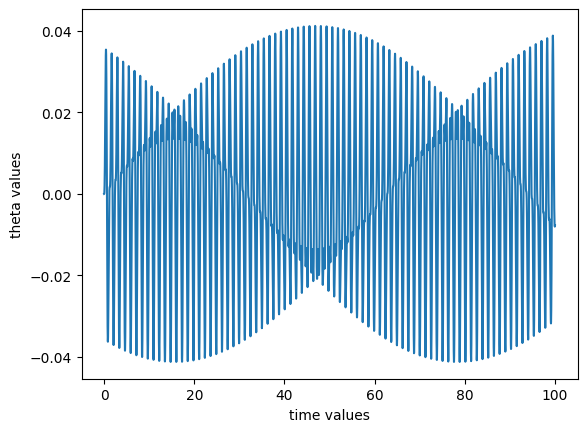

In [439]:
a = 0
b = 100
N = 10000
h = (b-a)/N
up_omega_a = 5

ra = array([0, 0], float)
tapoints = arange(a, b, h)

thetpoints, omgpoints = rouge_kutta(tapoints, ra, h, func1, up_omega_a)

xlabel('time values')
ylabel('theta values')
plot(tapoints, thetpoints)
show()

Alternative **b)** Now we need modify the Lambda parameter while C is constant, to find the ressonance value:

**You can add others values and take a look :)  $\hspace{1cm}$   ~ ( in all codes )**

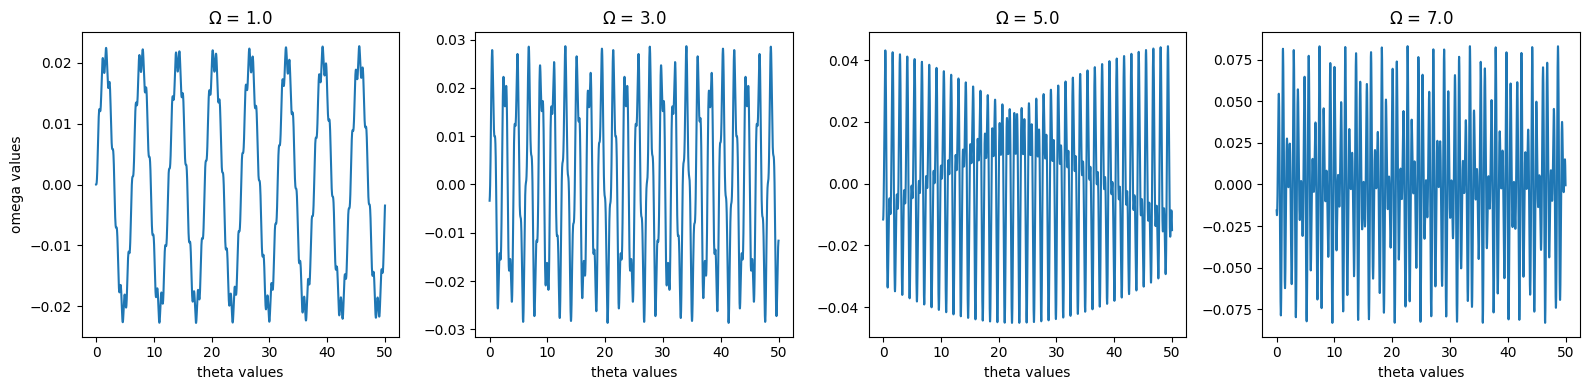

In [440]:
a = 0
b = 50
N = 10000
h = (b-a)/N
ta2points = arange(a, b, h)

ra2 = array([0, 0], float)

up_omega_a2_values = array([1, 3, 5, 7], float)                                   # you can add others values and take a look

fig, axs = plt.subplots(1, len(up_omega_a2_values), figsize = (4*len(up_omega_a2_values), 4))

for i in range(len(up_omega_a2_values)):

  theta2points, omga2points = rouge_kutta(ta2points, ra2, h, func1, up_omega_a2_values[i])
  axs[i].plot(ta2points, theta2points)
  axs[i].set_title(f'$\Omega$ = {up_omega_a2_values[i]}')
  axs[i].set_xlabel('theta values')

axs[0].set_ylabel('omega values')
plt.tight_layout()
plt.show()

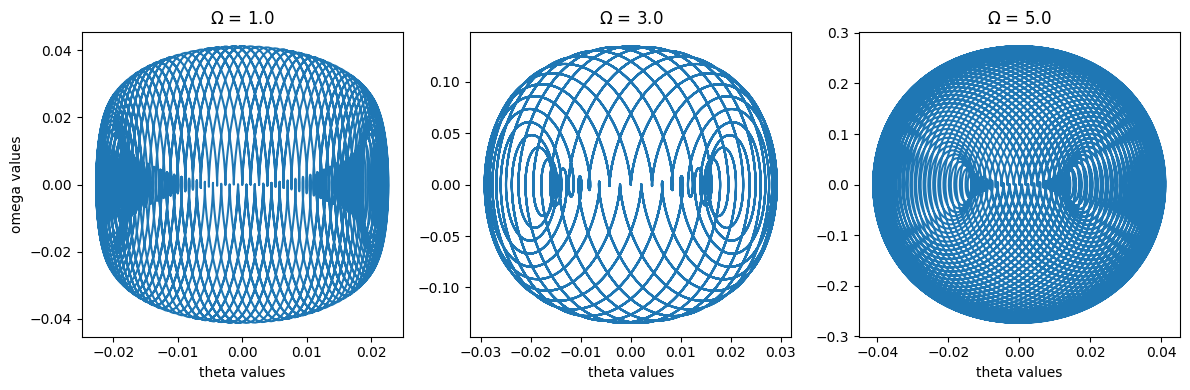

In [467]:
a = 0
b = 100
N = 10000
h = (b-a)/N

up_omega_b_values = array([1, 3, 5], float)                                       # you can add others values and take a look

fig, axs = plt.subplots(1, len(up_omega_b_values), figsize = (4*len(up_omega_b_values), 4))

for i in range(len(up_omega_b_values)):
  tbpoints = arange(a, b, h)
  rb = array([0, 0], float)

  thetbpoints, omgbpoints = rouge_kutta(tbpoints, rb, h, func1, up_omega_b_values[i])
  axs[i].plot(thetbpoints, omgbpoints)
  axs[i].set_title(f'$\Omega$ = {up_omega_b_values[i]}')
  axs[i].set_xlabel('theta values')

axs[0].set_ylabel('omega values')
plt.tight_layout()
plt.show()

### Problem 2 - Harmonic and anharmonic oscillators

Alternative **a)** We need to transform the two differential equations into four and solve them

$$ \frac{d^{2}x}{dt^{2}} = -\omega^{2}x $$

using that $ k = \frac{dx}{dt}$ we have:

$$ \frac{dk}{dt} = -\omega^{2}x \hspace{2cm} and \hspace{2cm} \frac{dx}{dt} = k $$

Now we can use the Rouge-Kutta method to solve this equations for **k function** and **x function**:

In [442]:
def func2(r, t, ramdom):

  w = 1
  x = r[0]
  k = r[1]

  fx = k
  fk = -x*w**2

  return array([fx, fk], float)

Our Rouge-Kutta function is done in previously question, so we put a ramdom fourth **parameter** only to use it:

Also i will plot the **Alternative b)**, that increasing the amplitude value:

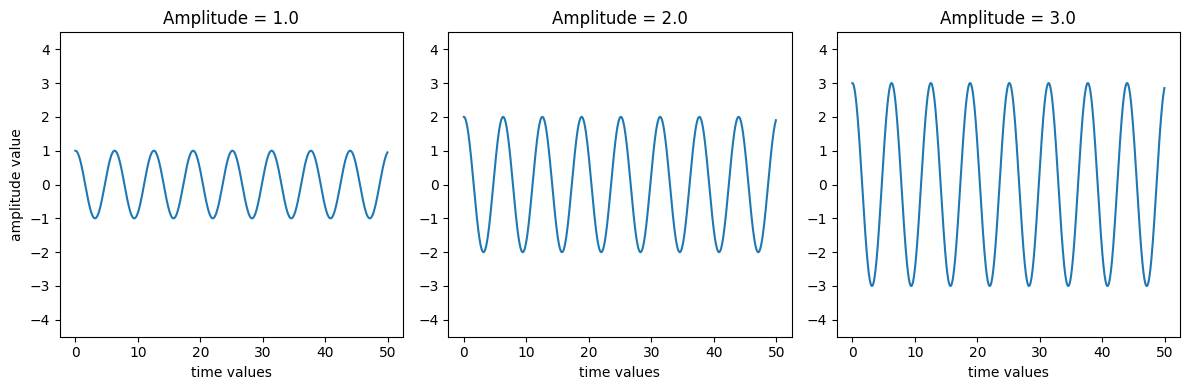

In [443]:
a = 0
b = 50
N = 1000
h = (b-a)/N

ramdom = 7
amplitude_initial_values = array([1, 2, 3], float)                                   # you can add others values and take a look
max = amplitude_initial_values.max()

fig, axs = plt.subplots(1, len(amplitude_initial_values), figsize = (4*len(amplitude_initial_values), 4))

for i in range(len(amplitude_initial_values)):

  tpoints = arange(a, b, h)


  r = array([amplitude_initial_values[i], 0], float)
  xpoints, kpoints = rouge_kutta(tpoints, r, h, func2, ramdom)

  axs[i].plot(tpoints, xpoints)
  axs[i].set_title(f'Amplitude = {amplitude_initial_values[i]}')
  axs[i].set_xlabel('time values')

  axs[i].set_ylim(-1.5*max, 1.5*max)

axs[0].set_ylabel('amplitude value')
plt.tight_layout()
show()

Alternative **c)** Now we need solve another equation:

$$ \frac{d^{2}x}{dt^{2}} = -\omega^{2}x^{3} $$

using that $ k = \frac{dx}{dt}$ we have:

$$ \frac{dk}{dt} = -\omega^{2}x^{3} \hspace{2cm} and \hspace{2cm} \frac{dx}{dt} = k $$

In [444]:
def func2_3grau(r, t, ramdom):

  w = 1
  x = r[0]
  k = r[1]

  fx = k
  fk = -(x**3)*w**2

  return array([fx, fk], float)

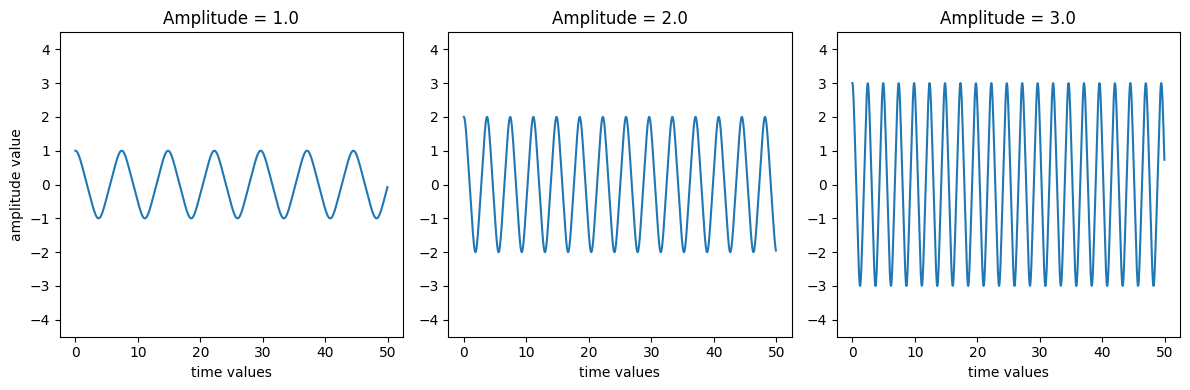

In [445]:
amplitude_initial_values = array([1, 2, 3], float)                                   # you can add others values and take a look

max = amplitude_initial_values.max()

fig, axs = plt.subplots(1, len(amplitude_initial_values), figsize = (4*len(amplitude_initial_values), 4))

for i in range(len(amplitude_initial_values)):

  r = array([amplitude_initial_values[i], 0], float)
  xpoints, kpoints = rouge_kutta(tpoints, r, h, func2_3grau, ramdom)

  axs[i].plot(tpoints, xpoints)
  axs[i].set_title(f'Amplitude = {amplitude_initial_values[i]}')
  axs[i].set_xlabel('time values')

  axs[i].set_ylim(-1.5*max, 1.5*max)

axs[0].set_ylabel('amplitude value')
plt.tight_layout()
show()

We can see that the frequency changes for oscillations with larger amplitudes

Alternative **d)** Now we will plot the velocity in function of position **(phase diagram)**:

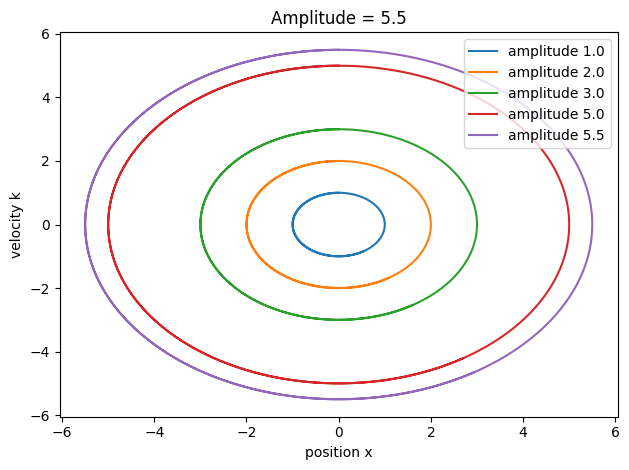

In [473]:
amplitude_initial_values = array([1, 2, 3, 5, 5.5], float)                                # you can add others values and take a look

max = amplitude_initial_values.max()

for i in range(len(amplitude_initial_values)):

  r = array([amplitude_initial_values[i], 0], float)

  xpoints, kpoints = rouge_kutta(tpoints, r, h, func2, ramdom)

  plot(kpoints, xpoints, label = f'amplitude {amplitude_initial_values[i]}')
  plt.title(f'Amplitude = {amplitude_initial_values[i]}')

plt.ylabel('velocity k')
plt.xlabel('position x')

plt.tight_layout()
plt.legend()
show()

Alternative **e)** Now we will solve the Van der Pol oscilator

$$ \frac{d^{2}x}{dt^{2}} - \mu (1-x^{2}) \frac{dx}{dt} + \omega^{2}x = 0$$

If we use $\frac{dx}{dt} = k$, we have the **k and x functions**:

$$ \frac{dk}{dt} - \mu (1-x^{2}) k + \omega^{2}x = 0 \hspace{2cm} and \hspace{2cm} \frac{dx}{dt} = k $$

In [447]:
def func2_vanderpol(r, t, mu):

  w = 1
  x = r[0]
  k = r[1]

  fx = k
  fk = mu*(1-x**2)*k-(x*w**2)

  return array([fx, fk], float)

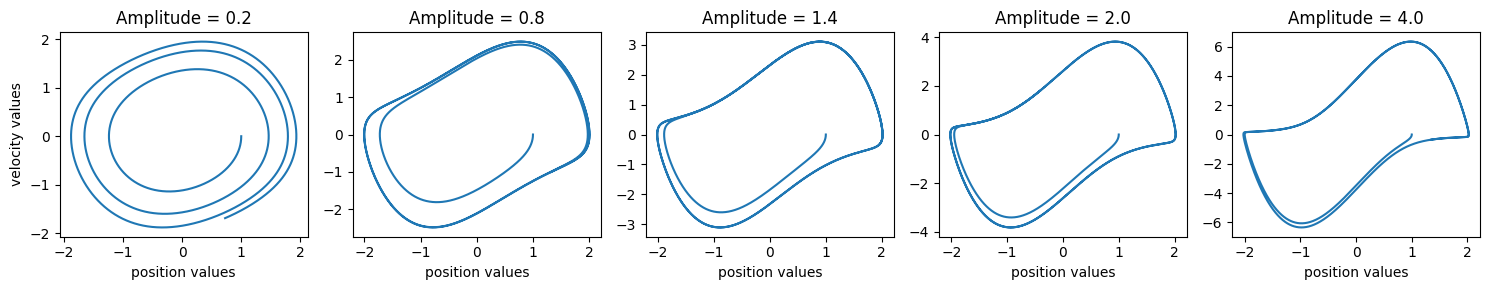

In [448]:
a = 0
b = 20
N = 30000
h = (b-a)/N
tpoints = arange(a, b, h)

mu_values = array([0.2, 0.8, 1.4, 2, 4], float)                                   # you can add others values and take a look

fig, axs = plt.subplots(1, len(mu_values), figsize = (3*len(mu_values), 3))

for i in range(len(mu_values)):

  r = array([1, 0], float)
  xpoints, kpoints = rouge_kutta(tpoints, r, h, func2_vanderpol, mu_values[i])

  axs[i].plot(xpoints, kpoints)
  axs[i].set_title(f'Amplitude = {mu_values[i]}')
  axs[i].set_xlabel('position values')

  # axs[i].set_ylim(-1.5*max, 1.5*max)

axs[0].set_ylabel('velocity values')
plt.tight_layout()
show()

### Problem 3 - Trajectory with air resistance

Alternative **a)** Demonstrate the equations

We know that $$ F = \frac{\pi}{2} R^{2} \rho C v^{2} \hspace{2cm} \rightarrow \hspace{2cm} F_{x} = - \frac{\pi}{2} R^{2} \rho C v^{2} \frac{v_{x}}{v}$$

so, since $\hspace{2cm}v = \sqrt{v_{x}^{2} + v_{y}^{2}} = \sqrt{\dot x^{2} + \dot y^{2}} \hspace{2cm}$ and $\hspace{2cm} F_{x} = m \frac{d^{2}x}{dt^{2}} \hspace{2cm}$ we have:

$$m \frac{d^{2}x}{dt^{2}} = - \frac{\pi}{2} R^{2} \rho C v v_{x} \hspace{2cm} \rightarrow \hspace{2cm} \boxed{\ddot x = - \frac{\pi}{2m} R^{2} \rho C \dot x \sqrt{\dot x^{2} + \dot y^{2}}}$$

Doing the same for $$ F_{y} = -mg - \frac{\pi}{2} R^{2} \rho C v^{2} \frac{v_{x}}{v}$$

we have: $$ \boxed{ \ddot y = - g - \frac{\pi}{2m} R^{2} \rho C \dot y \sqrt{\dot x^{2} + \dot y^{2}}}$$

Alternative **b)** We need create a Rouge-Kutta function which will receive 4 parameters, 2 for positions and 2 for velocities:

In [449]:
def func3(r, t, m):

  R, C = 0.08, 0.47
  p, g = 1.22, 9.8

  x, y = r[0], r[1]
  vx, vy = r[2], r[3]

  k = (pi*(R**2)*p*C)/(2*m)
  root = sqrt(vx**2 + vy**2)

  fx = vx
  fy = vy

  fvx = -k*vx*root
  fvy = -g-k*vy*root

  return array([fx, fy, fvx, fvy], float)

def rouge_kutta34(tpoints, r, h, func_name, m):

  xpoints, xvpoints = [], []
  ypoints, yvpoints = [], []

  for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])

    xvpoints.append(r[2])
    yvpoints.append(r[3])

    k1 = h*func_name(r, t, m)
    k2 = h*func_name(r+0.5*k1, t+0.5*h, m)
    k3 = h*func_name(r+0.5*k2, t+0.5*h, m)
    k4 = h*func_name(r+k3, t+h, m)

    r += (k1+2*k2+2*k3+k4)/6

  return xpoints, ypoints, xvpoints, yvpoints

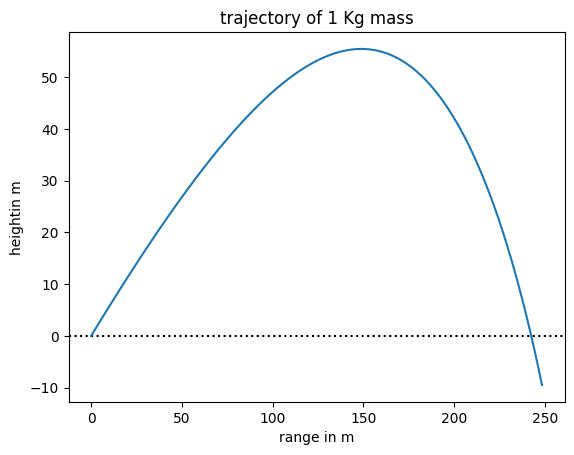

In [462]:
a = 0
b = 7
N = 100
h = (b-a)/N
tpoints = arange(a, b, h)

mass0 = 1

r3 = array([0, 0, 100*cos(radians(30)), 100*sin(radians(30))], float)

x, y, vx, vy = rouge_kutta34(tpoints, r3, h, func3, mass0)

plt.axhline(y = 0, linestyle=':', c='k')

title('trajectory of 1 Kg mass')
xlabel('range in m')
ylabel('heightin m')
plot(x, y)
show()

Alternative **c)** Maximum range estimate with varying mass

Code to find the the **maximum range** of mass:

In [463]:
def find_max_range(x, y):

  idx = 0
  y_copy = y[1:]
  accuracy = 1

  for i, value in enumerate(y_copy):
    if abs(value) < accuracy and i > 5:
      idx = i
      max_range = x[idx+1]
      return max_range

Code to solve rouge-kutta and plot the trajectory of the masses:

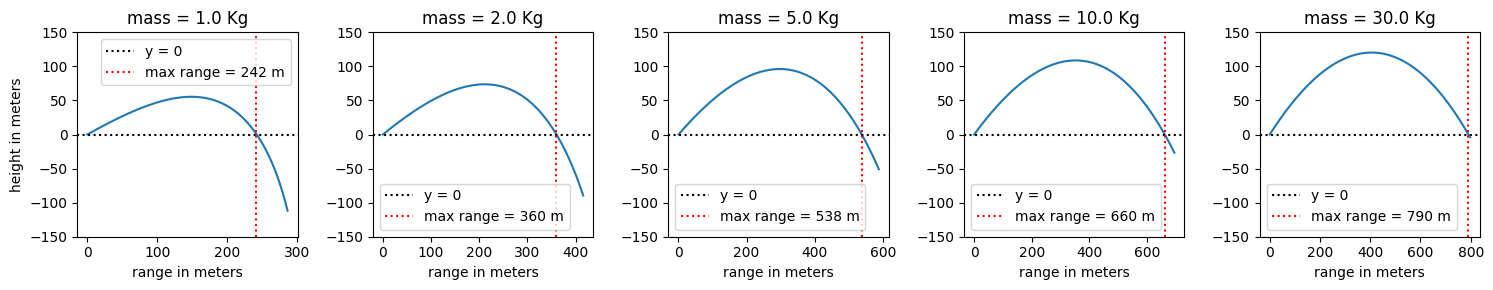

In [464]:
a = 0
b = 10
N = 1000
h = (b-a)/N
tpoints = arange(a, b, h)

mass = array([1, 2, 5, 10, 30], float)                                            # you can add others values and take a look

fig, axs = plt.subplots(1, len(mass), figsize = (3*len(mass), 3))

for i in range(len(mass)):

  r3 = array([0, 0, 100*cos(radians(30)), 100*sin(radians(30))], float)
  x, y, vx, vy = rouge_kutta34(tpoints, r3, h, func3, mass[i])

  max_range = find_max_range(x, y)

  axs[i].plot(x, y)
  axs[i].axhline(y = 0, linestyle=':', c='k', label = 'y = 0')
  axs[i].axvline(x = max_range, linestyle=':', c='red', label = f'max range = {max_range:.0f} m')

  axs[i].set_title(f'mass = {mass[i]} Kg')
  axs[i].set_xlabel('range in meters')
  axs[i].set_ylim(-150, 150)
  axs[i].legend()

axs[0].set_ylabel('height in meters')
plt.tight_layout()
plt.show()

We can see that if we increase the mass value, the maximum range is greater than for lower masses.

This happens because if we look at the differential equations, we see that by increasing the mass, we decrease the negative term, so the horizontal and vertical accelerations increase. Since vertical acceleration increases on ascent and descent equally, there is no contribution to time.

### Problem 4 - Space junk

Alternative **a)** Equation demonstration ~ easy

If the Rod is in z-axis, so the gravitational forces will be in xy-plane, because the ball bearing is in the center:

$$ dF = \frac{GmdM}{r^{2}} cos(\theta) = \frac{GmdM}{r^{2}} \frac{R}{r} \hspace{2cm} \rightarrow \hspace{2cm} \int dF = GmR \int \frac{dM}{r^{3}}$$

since $\hspace{1cm}dM = \lambda dz \hspace{1cm} $and$ \hspace{1cm} r = \sqrt{x^{2} + y^{2} + z^{2}} \hspace{1cm}$ we have:

$$ F = Gm \lambda R \int_{\frac{-L}{2}}^{\frac{L}{2}} \frac{dz}{(x^{2} + y^{2} + z^{2})^{3/2}}$$

using $\hspace{1cm} \lambda = \frac{M}{L} \hspace{1cm}and\hspace{1cm} R = \sqrt{x^{2} + y^{2}}\hspace{1cm}$, finally:

$$ F = \frac{GMm}{L} \sqrt{x^{2} + y^{2}} \int_{\frac{-L}{2}}^{\frac{L}{2}} \frac{dz}{(x^{2} + y^{2} + z^{2})^{3/2}}$$

Alternative **b)** We need create a Rouge-Kutta function which will receive 4 parameters, 2 for positions and 2 for velocities:

In [465]:
def func4(r, t, ramdom):

  G, L, M = 1, 2, 10

  x, y = r[0], r[1]
  vx, vy = r[2], r[3]

  r2 = x**2 + y**2
  denom = r2*sqrt(r2 + (L**2)/4)

  fx = vx
  fy = vy

  fvx = -(G*M*x)/denom
  fvy = -(G*M*y)/denom

  return array([fx, fy, fvx, fvy], float)

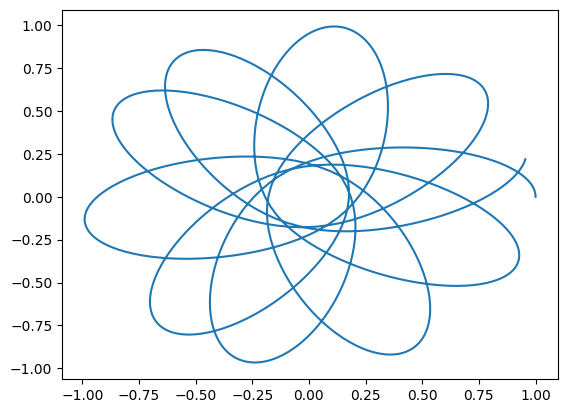

In [466]:
a = 0
b = 10
N = 1000
h = (b-a)/N
tpoints = arange(a, b, h)

ramdom = 7

r4 = array([1, 0, 0, 1], float)
x, y, vx, vy = rouge_kutta34(tpoints, r4, h, func4, ramdom)

plot(x, y)
show()